In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("C:/Users/HP/Downloads/sms/spamraw.csv")

In [3]:
df1.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
df1.isnull().sum()

type    0
text    0
dtype: int64

In [5]:
df1.shape

(5559, 2)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df1['type'] = encoder.fit_transform(df1['type'])

In [8]:
df1.head()

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [9]:
df1.duplicated().sum()

403

In [10]:
df1 = df1.drop_duplicates(keep = 'first')

In [11]:
df1.duplicated().sum()

0

In [12]:
df1.shape

(5156, 2)

In [13]:
df1['type'].value_counts()

0    4503
1     653
Name: type, dtype: int64

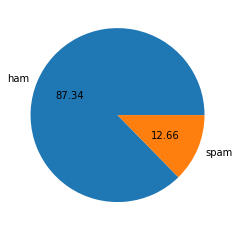

In [14]:
import matplotlib.pyplot as plt
plt.pie(df1['type'].value_counts(), labels=['ham','spam'], autopct = "%0.2f")
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df1['num_characters'] = df1['text'].apply(len)
df1.head()

,type,text,num_characters
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161


In [18]:
df1['num_sent'] = df1['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [19]:
df1.head()

,type,text,num_characters,num_sent
0,0,Hope you are having a good week. Just checking in,49,2
1,0,K..give back my thanks.,23,1
2,0,Am also doing in cbe only. But have to pay.,43,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,3
4,1,okmail: Dear Dave this is your final notice to...,161,3


In [20]:
df1['num_word'] = df1['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [21]:
df1.head()

,type,text,num_characters,num_sent,num_word
0,0,Hope you are having a good week. Just checking in,49,2,11
1,0,K..give back my thanks.,23,1,7
2,0,Am also doing in cbe only. But have to pay.,43,2,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,3,23
4,1,okmail: Dear Dave this is your final notice to...,161,3,32


In [22]:
df1[['num_characters','num_sent','num_word']].describe()

,num_characters,num_sent,num_word
count,5156.000000,5156.000000,5156.000000
mean,78.658650,1.969550,18.173778
std,57.615649,1.442746,12.753701
min,2.000000,1.000000,1.000000
25%,35.000000,1.000000,9.000000
50%,60.000000,1.500000,14.000000
75%,117.250000,2.000000,26.000000
max,910.000000,38.000000,196.000000


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='num_word', ylabel='Count'>

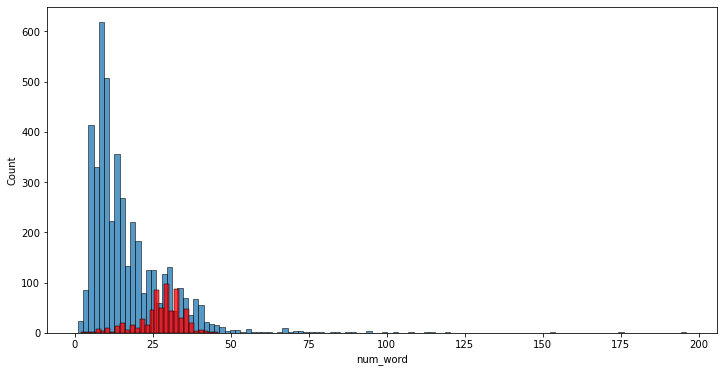

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['type'] == 0]['num_word'])
sns.histplot(df1[df1['type'] == 1]['num_word'], color = 'red')

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

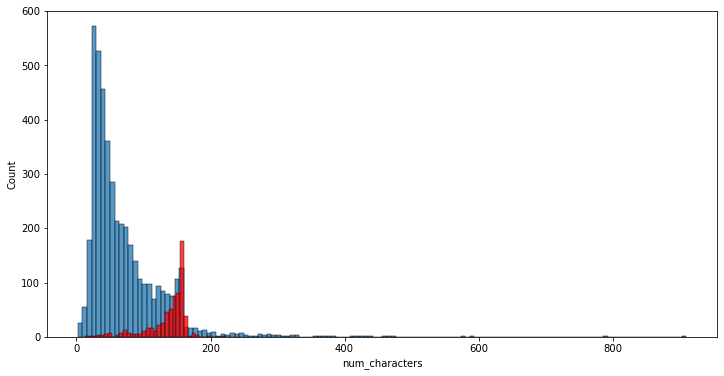

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['type'] == 0]['num_characters'])
sns.histplot(df1[df1['type'] == 1]['num_characters'], color = 'red')

<AxesSubplot:>

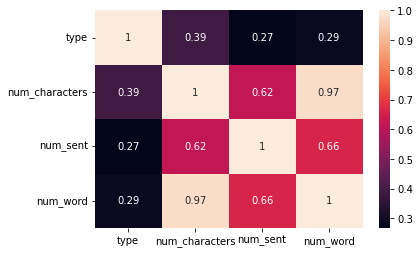

In [26]:
sns.heatmap(df1.corr(),annot=True)

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [35]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [36]:
df1['text'][10]

'Sure thing big man. i have hockey elections at 6, shouldn€˜t go on longer than an hour though'

In [37]:
transform_text('Sure thing big man. i have hockey elections at 6, shouldn€˜t go on longer than an hour though')

'sure thing big man hockey elect 6 go longer hour though'

In [38]:
df1['trans_text'] = df1['text'].apply(transform_text)

In [39]:
df1.head()

,type,text,num_characters,num_sent,num_word,trans_text
0,0,Hope you are having a good week. Just checking in,49,2,11,hope good week check
1,0,K..give back my thanks.,23,1,7,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,2,12,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,3,23,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,3,32,okmail dear dave final notic collect 4 tenerif...


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [41]:
spam_wc = wc.generate(df1[df1['type'] == 1]['trans_text'].str.cat(sep = " "))

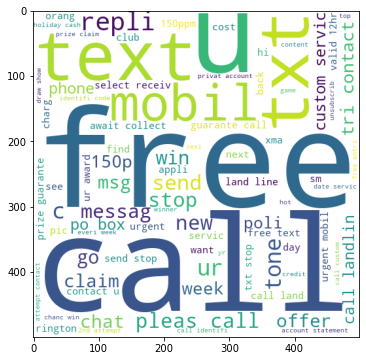

In [42]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df1[df1['type'] == 0]['trans_text'].str.cat(sep = " "))

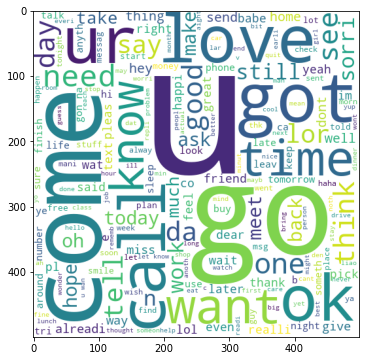

In [44]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 4000)

In [46]:
x = tfidf.fit_transform(df1['trans_text']).toarray()

In [47]:
x.shape

(5156, 4000)

In [48]:
y = df1['type'].values

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [52]:
mnb = MultinomialNB()

In [58]:
mnb.fit(X_train,Y_train)
pred = mnb.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))

0.9699612403100775
[[896   0]
 [ 31 105]]
1.0


In [59]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression

In [60]:
gnb = GaussianNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(X_train,Y_train)
pred = gnb.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))

0.8507751937984496
[[762 134]
 [ 20 116]]
0.464


In [62]:
bnb.fit(X_train,Y_train)
pred = bnb.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))

0.9777131782945736
[[895   1]
 [ 22 114]]
0.991304347826087


In [63]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [64]:
lrc.fit(X_train,Y_train)
pred = lrc.predict(X_test)
print(accuracy_score(Y_test,pred))
print(confusion_matrix(Y_test,pred))
print(precision_score(Y_test,pred))

0.9486434108527132
[[892   4]
 [ 49  87]]
0.9560439560439561


In [66]:
dict1 = {'MN': mnb,'GN': gnb,'BN': bnb,'LR': lrc}

In [67]:
def train_classifier(clf,X_train,Y_train,X_test,y_test):
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [70]:
acc = []
pre = []

for name,clf in dict1.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("\n-----------------------------\n")
    
    acc.append(current_accuracy)
    pre.append(current_precision)

For  MN
Accuracy -  0.9699612403100775
Precision -  1.0

-----------------------------

For  GN
Accuracy -  0.8507751937984496
Precision -  0.464

-----------------------------

For  BN
Accuracy -  0.9777131782945736
Precision -  0.991304347826087

-----------------------------

For  LR
Accuracy -  0.9486434108527132
Precision -  0.9560439560439561

-----------------------------



In [71]:
performance_df = pd.DataFrame({'Algorithm':dict1.keys(),'Accuracy':acc,'Precision':pre}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,MN,0.969961,1.000000
2,BN,0.977713,0.991304
3,LR,0.948643,0.956044
1,GN,0.850775,0.464000


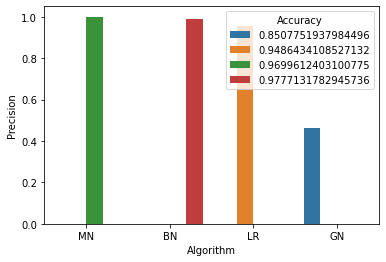

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a titanic.csv file
# from seaborn library
 
# who v/s fare barplot
sns.barplot(x = 'Algorithm',
            y = 'Precision',
            hue = 'Accuracy',
            data = performance_df)
 
# Show the plot
plt.show()

In [176]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [178]:
pickle.dump(mnb,open('model.pkl','wb'))